In [14]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [15]:
N = 10
j = 1
with open(f'ACI_linear_experiment_{N}_{j}.pkl', 'rb') as fp:
    experiment = pickle.load(fp)

def cum_mean(data):
    return np.cumsum(data) / np.arange(1, len(data) + 1)

print('epsilon = ', experiment[0]['epsilon'])
print('gamma = ', experiment[0]['gamma'])

epsilon =  0.1
gamma =  0


# Some nice plots to begin with

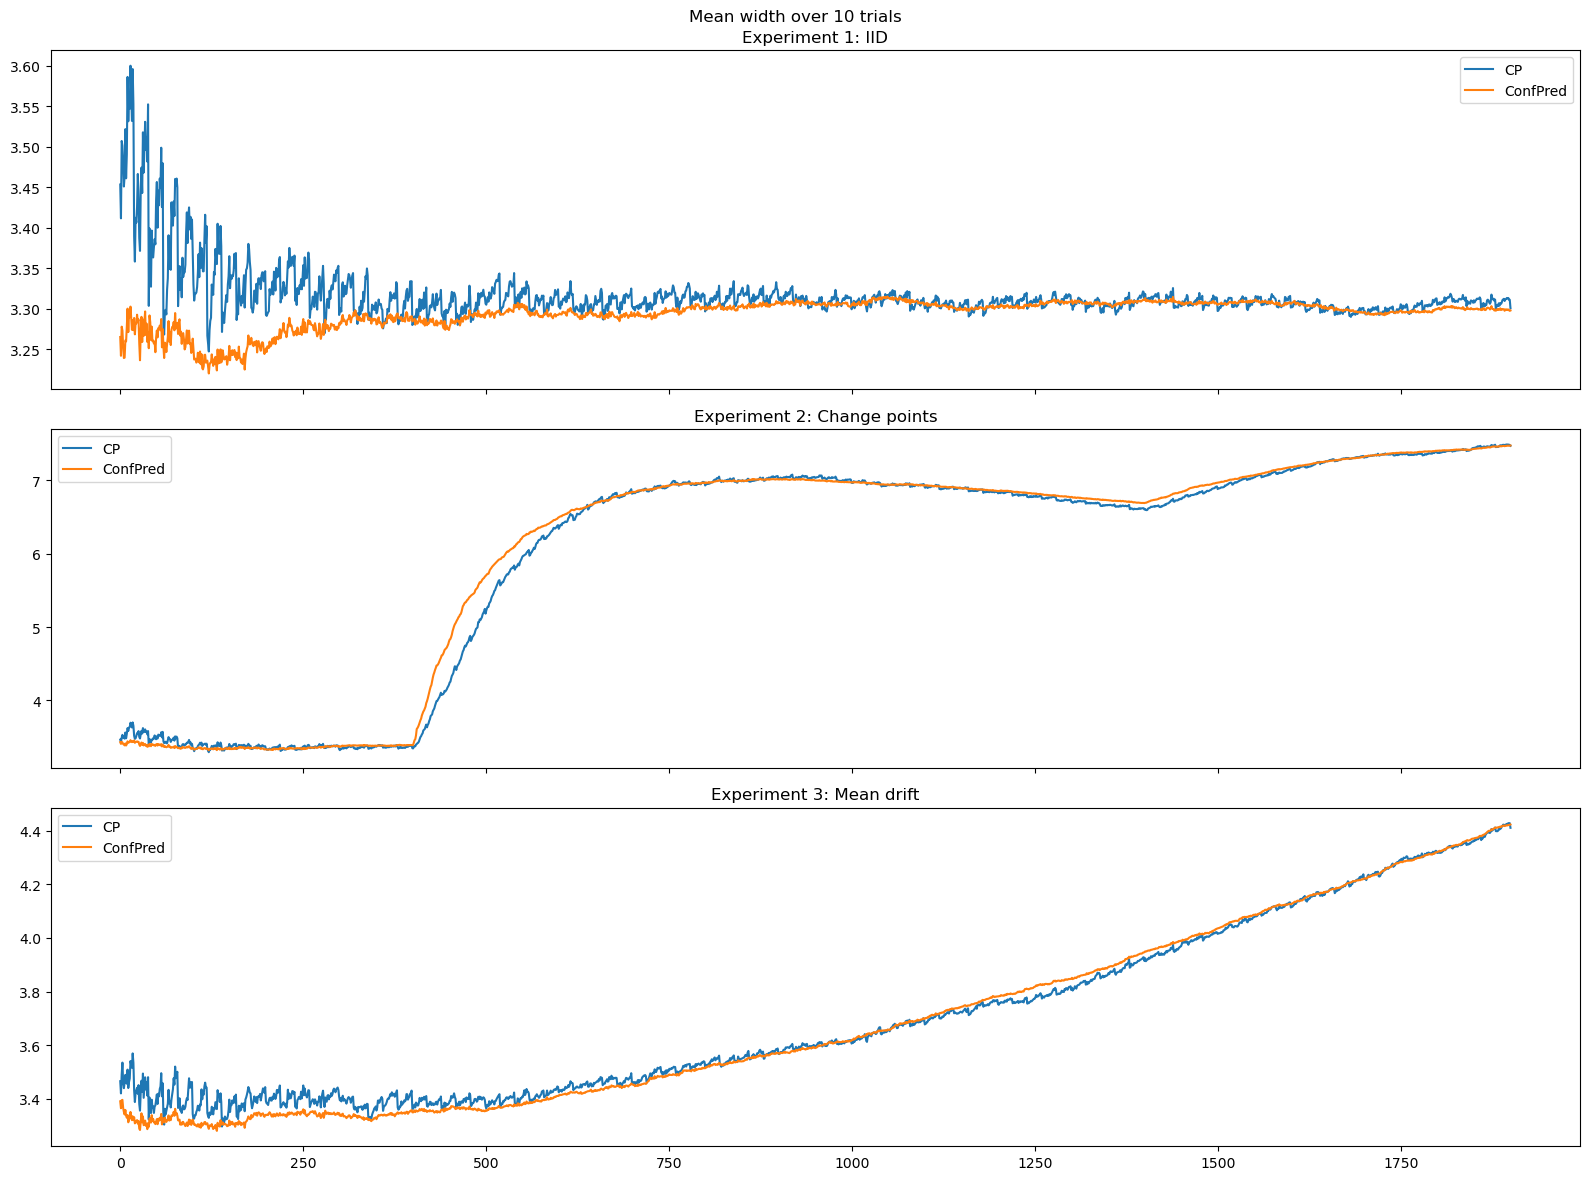

In [16]:
fig, axs = plt.subplots(ncols=1, nrows=3, sharey=False, sharex=True, figsize=(16,12))

axs[0].plot(
    np.array([experiment[i]['iid']['cp']['result'][:,1] for i in range(N)]).mean(axis=0),
    label='CP'
)
axs[0].plot(
    np.array([experiment[i]['iid']['ols']['result'][:,1] for i in range(N)]).mean(axis=0),
    label='ConfPred'
)
axs[0].legend()
axs[0].set_title('Experiment 1: IID')


axs[1].plot(
    np.array([experiment[i]['change_points']['cp']['result'][:,1] for i in range(N)]).mean(axis=0),
    label='CP'
)
axs[1].plot(
    np.array([experiment[i]['change_points']['ols']['result'][:,1] for i in range(N)]).mean(axis=0),
    label='ConfPred'
)
axs[1].legend()
axs[1].set_title('Experiment 2: Change points')


axs[2].plot(
    np.array([experiment[i]['drift']['cp']['result'][:,1] for i in range(N)]).mean(axis=0),
    label='CP'
)
axs[2].plot(
    np.array([experiment[i]['drift']['ols']['result'][:,1] for i in range(N)]).mean(axis=0),
    label='ConfPred'
)
axs[2].legend()
axs[2].set_title('Experiment 3: Mean drift')

fig.suptitle(f'Mean width over {N} trials')
fig.tight_layout()

In [19]:
setting = 'drift'
print(f"Finite IS CP: {np.array([experiment[i][setting]['cp']['finite_IS'] for i in range(N)]).mean(axis=0).mean()}")
print(f"Finite IS QRF: {np.array([experiment[i][setting]['ols']['finite_IS'] for i in range(N)]).mean(axis=0).mean()}")

Finite IS CP: 5.827146820756768
Finite IS QRF: 5.812504103061878


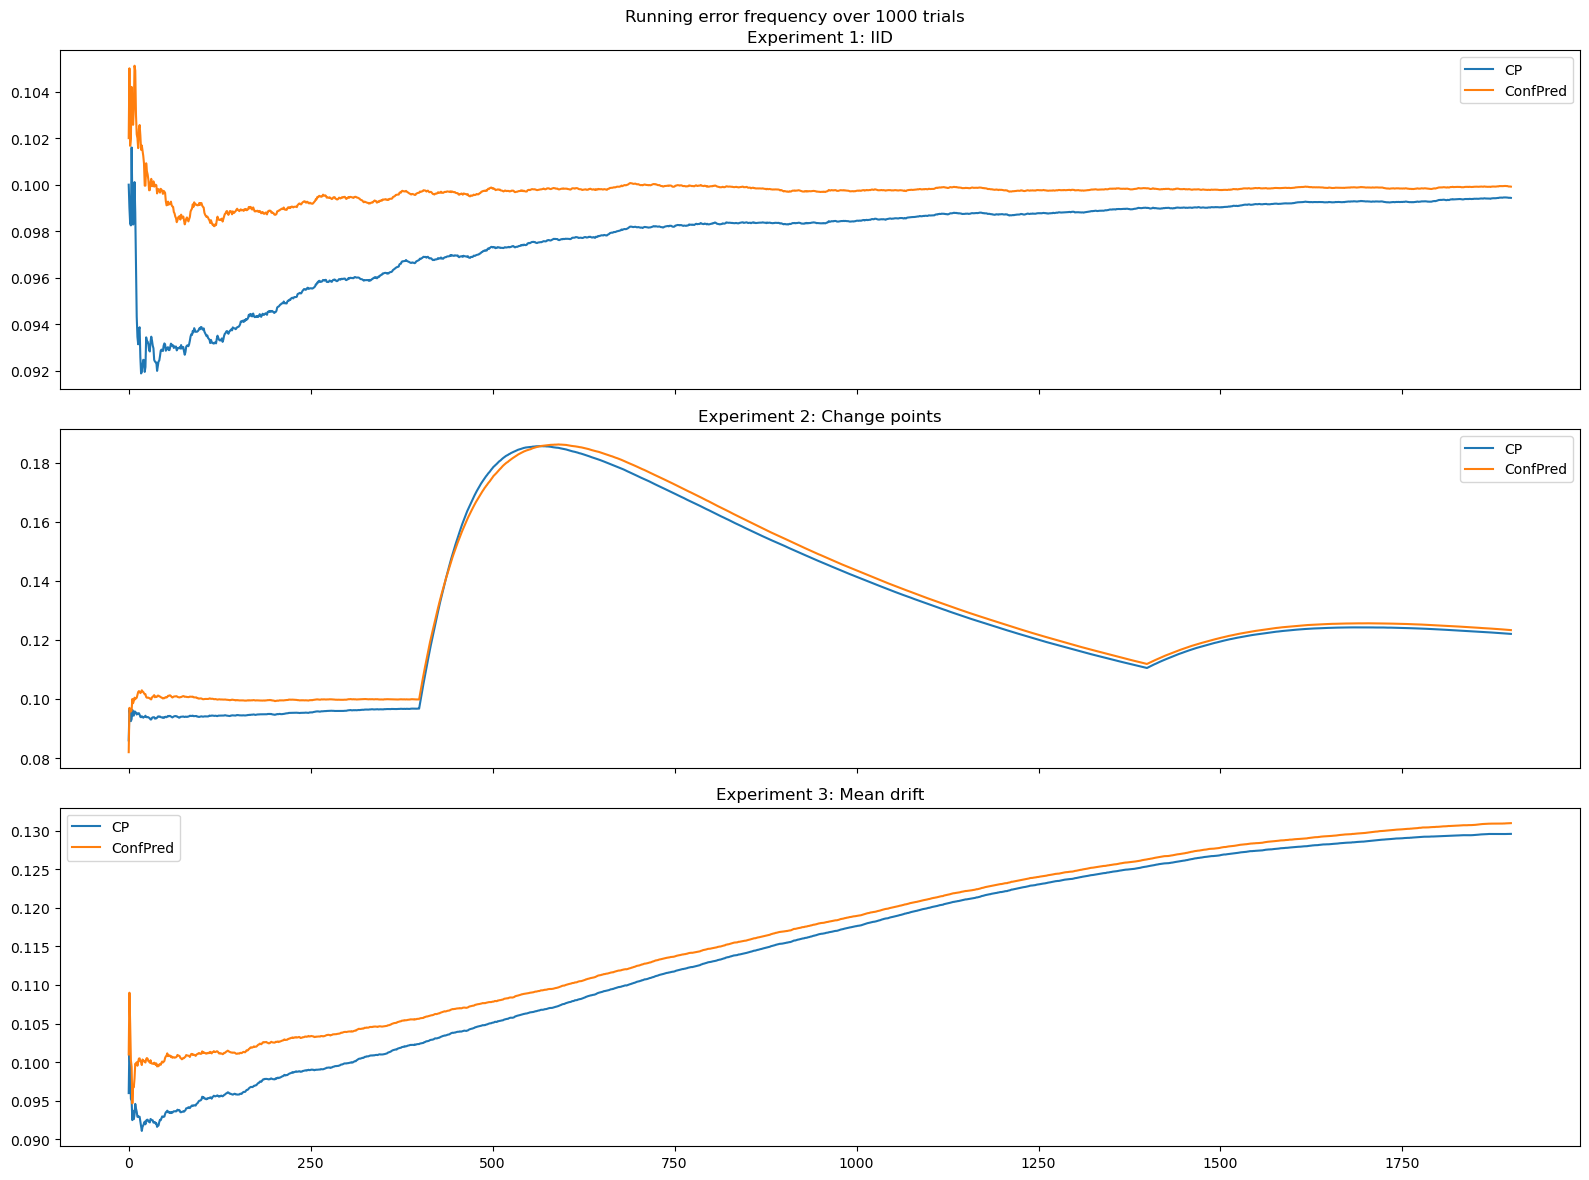

In [6]:
fig, axs = plt.subplots(ncols=1, nrows=3, sharey=False, sharex=True, figsize=(16,12))

axs[0].plot(
    np.array([cum_mean(experiment[i]['iid']['cp']['result'][:,0]) for i in range(N)]).mean(axis=0),
    label='CP'
)
axs[0].plot(
    np.array([cum_mean(experiment[i]['iid']['ols']['result'][:,0]) for i in range(N)]).mean(axis=0),
    label='ConfPred'
)
axs[0].legend()
axs[0].set_title('Experiment 1: IID')


axs[1].plot(
    np.array([cum_mean(experiment[i]['change_points']['cp']['result'][:,0]) for i in range(N)]).mean(axis=0),
    label='CP'
)
axs[1].plot(
    np.array([cum_mean(experiment[i]['change_points']['ols']['result'][:,0]) for i in range(N)]).mean(axis=0),
    label='ConfPred'
)
axs[1].legend()
axs[1].set_title('Experiment 2: Change points')


axs[2].plot(
    np.array([cum_mean(experiment[i]['drift']['cp']['result'][:,0]) for i in range(N)]).mean(axis=0),
    label='CP'
)
axs[2].plot(
    np.array([cum_mean(experiment[i]['drift']['ols']['result'][:,0]) for i in range(N)]).mean(axis=0),
    label='ConfPred'
)
axs[2].legend()
axs[2].set_title('Experiment 3: Mean drift')

fig.suptitle(f'Running error frequency over {N} trials')
fig.tight_layout()

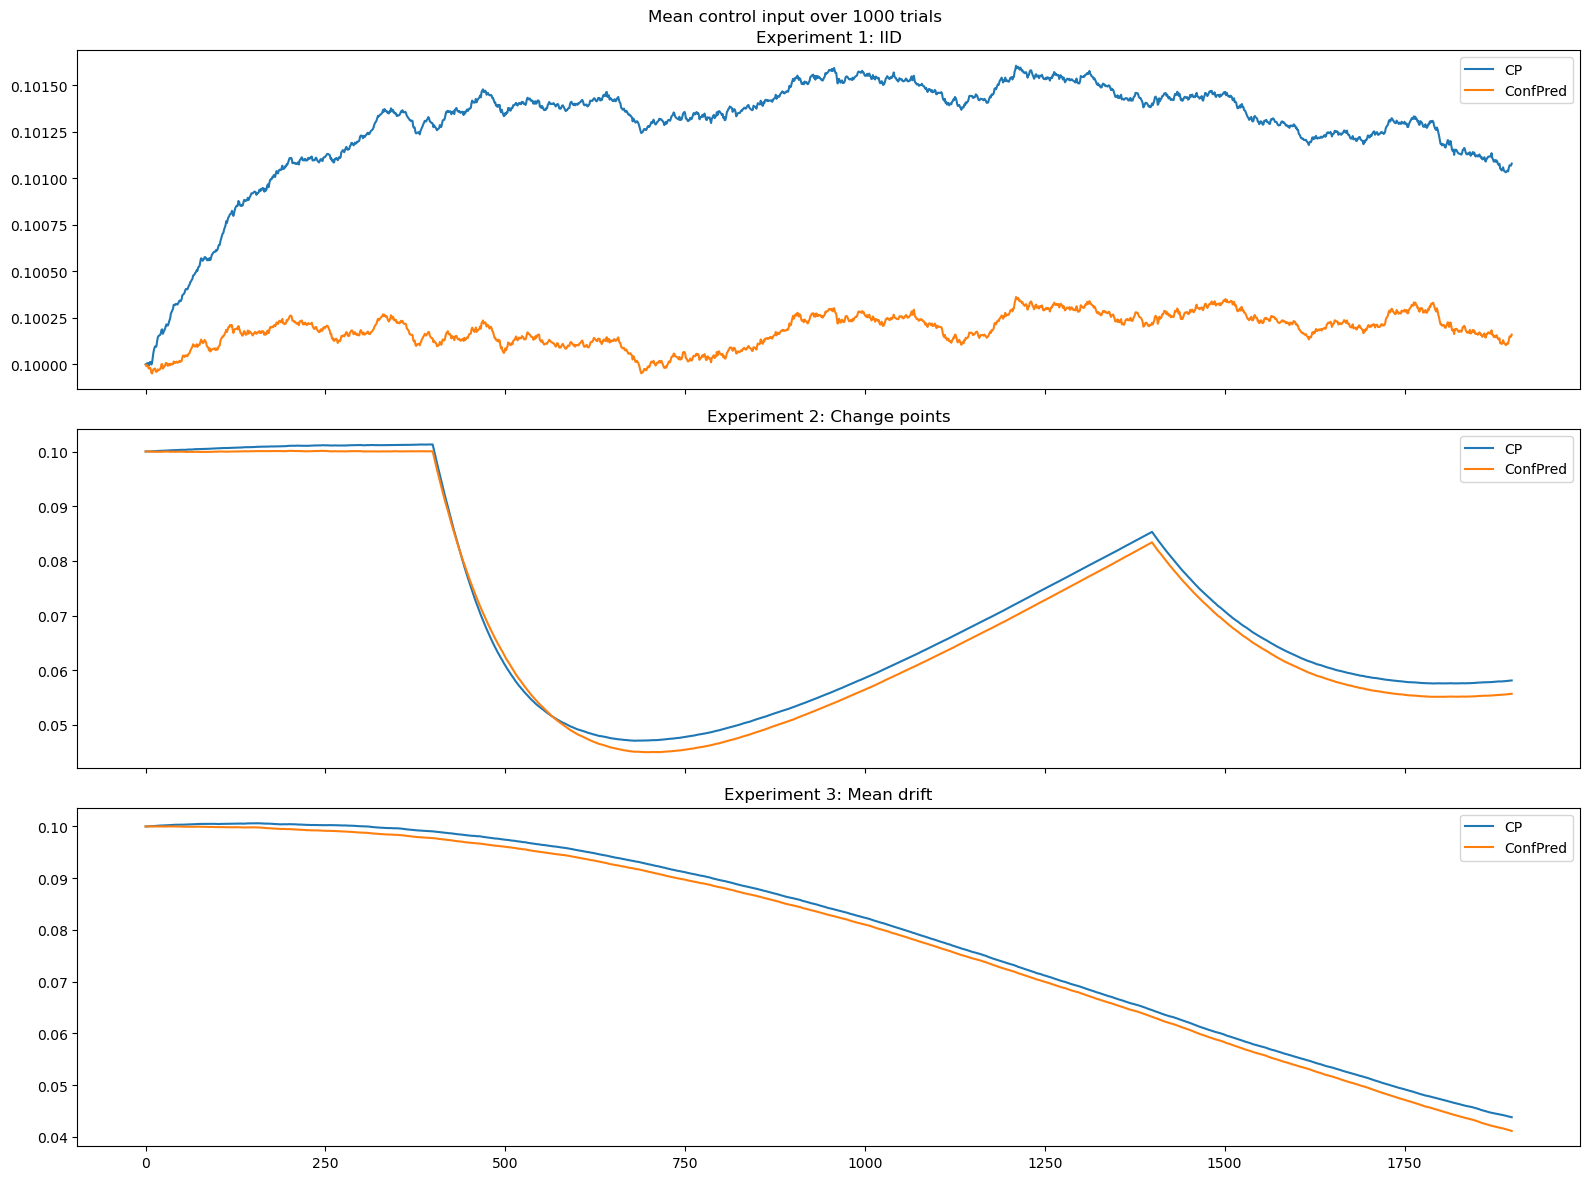

In [7]:
fig, axs = plt.subplots(ncols=1, nrows=3, sharey=False, sharex=True, figsize=(16,12))

axs[0].plot(
    np.array([experiment[i]['iid']['cp']['result'][:,2] for i in range(N)]).mean(axis=0),
    label='CP'
)
axs[0].plot(
    np.array([experiment[i]['iid']['ols']['result'][:,2] for i in range(N)]).mean(axis=0),
    label='ConfPred'
)
axs[0].legend()
axs[0].set_title('Experiment 1: IID')


axs[1].plot(
    np.array([experiment[i]['change_points']['cp']['result'][:,2] for i in range(N)]).mean(axis=0),
    label='CP'
)
axs[1].plot(
    np.array([experiment[i]['change_points']['ols']['result'][:,2] for i in range(N)]).mean(axis=0),
    label='ConfPred'
)
axs[1].legend()
axs[1].set_title('Experiment 2: Change points')


axs[2].plot(
    np.array([experiment[i]['drift']['cp']['result'][:,2] for i in range(N)]).mean(axis=0),
    label='CP'
)
axs[2].plot(
    np.array([experiment[i]['drift']['ols']['result'][:,2] for i in range(N)]).mean(axis=0),
    label='ConfPred'
)
axs[2].legend()
axs[2].set_title('Experiment 3: Mean drift')

fig.suptitle(f'Mean control input over {N} trials')
fig.tight_layout()

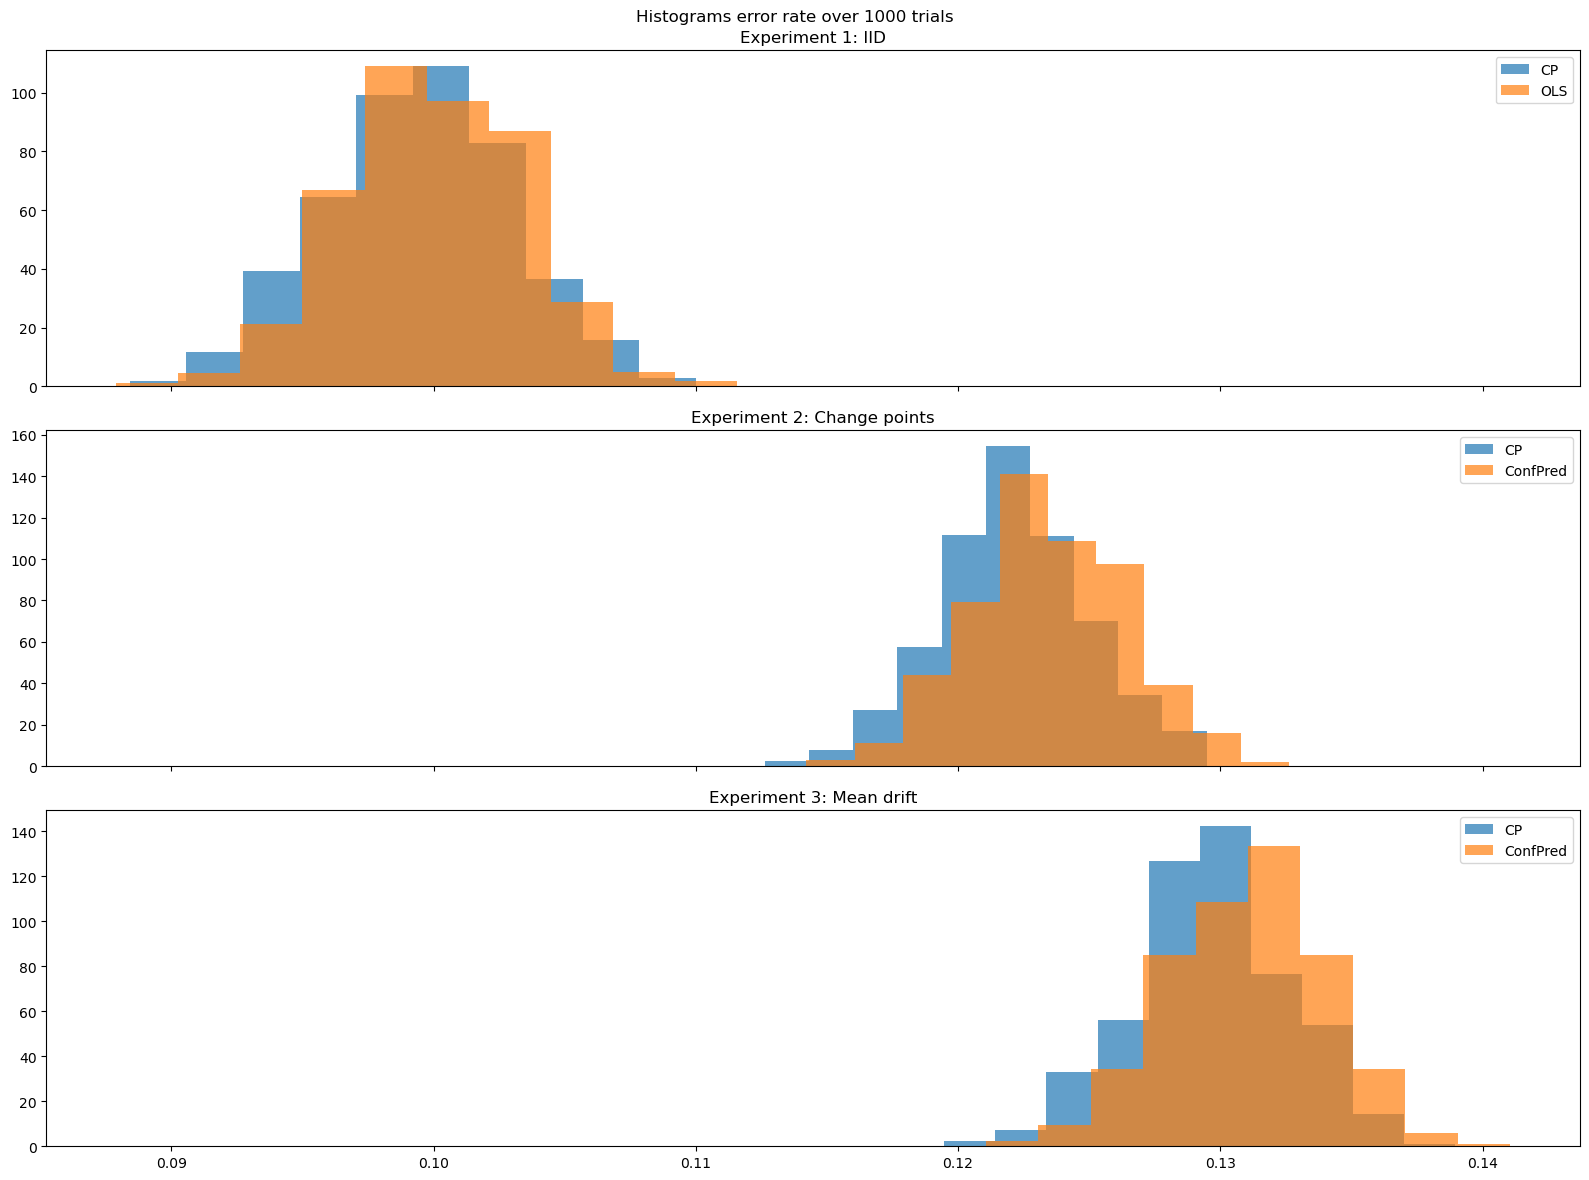

In [8]:
fig, axs = plt.subplots(ncols=1, nrows=3, sharey=False, sharex=True, figsize=(16,12))

axs[0].hist(
    np.array([experiment[i]['iid']['cp']['result'][:,0].mean() for i in range(N)]), density=True, alpha=0.7,
    label='CP'
)
axs[0].hist(
    np.array([experiment[i]['iid']['ols']['result'][:,0].mean() for i in range(N)]), density=True, alpha=0.7,
    label='OLS'
)
axs[0].legend()
axs[0].set_title('Experiment 1: IID')


axs[1].hist(
    np.array([experiment[i]['change_points']['cp']['result'][:,0].mean() for i in range(N)]), density=True, alpha=0.7,
    label='CP'
)
axs[1].hist(
    np.array([experiment[i]['change_points']['ols']['result'][:,0].mean() for i in range(N)]), density=True, alpha=0.7,
    label='ConfPred'
)
axs[1].legend()
axs[1].set_title('Experiment 2: Change points')


axs[2].hist(
    np.array([experiment[i]['drift']['cp']['result'][:,0].mean() for i in range(N)]), density=True, alpha=0.7,
    label='CP'
)
axs[2].hist(
    np.array([experiment[i]['drift']['ols']['result'][:,0].mean() for i in range(N)]), density=True, alpha=0.7,
    label='ConfPred'
)
axs[2].legend()
axs[2].set_title('Experiment 3: Mean drift')

fig.suptitle(f'Histograms error rate over {N} trials')
fig.tight_layout()

In [9]:
# fig, axs = plt.subplots(ncols=1, nrows=3, sharey=False, sharex=True, figsize=(16,12))

# axs[0].hist(
#     np.array([experiment[i]['iid']['cp']['result'][:,1].mean() for i in range(N)]), density=True, alpha=0.7,
#     label='CP'
# )
# axs[0].hist(
#     np.array([experiment[i]['iid']['ols']['result'][:,1].mean() for i in range(N)]), density=True, alpha=0.7,
#     label='OLS'
# )
# axs[0].legend()
# axs[0].set_title('Experiment 1: IID')


# axs[1].hist(
#     np.array([experiment[i]['change_points']['cp']['result'][:,1].mean() for i in range(N)]), density=True, alpha=0.7,
#     label='CP'
# )
# axs[1].hist(
#     np.array([experiment[i]['change_points']['ols']['result'][:,1].mean() for i in range(N)]), density=True, alpha=0.7,
#     label='ConfPred'
# )
# axs[1].legend()
# axs[1].set_title('Experiment 2: Change points')


# axs[2].hist(
#     np.array([experiment[i]['drift']['cp']['result'][:,1].mean() for i in range(N)]), density=True, alpha=0.7,
#     label='CP'
# )
# axs[2].hist(
#     np.array([experiment[i]['drift']['ols']['result'][:,1].mean() for i in range(N)]), density=True, alpha=0.7,
#     label='ConfPred'
# )
# axs[2].legend()
# axs[2].set_title('Experiment 3: Mean drift')

# fig.suptitle(f'Histograms average width rate over {N} trials')
# fig.tight_layout()

# Check guarantees

In [10]:
abs_bound = np.abs(experiment[0]['epsilon'] - experiment[0]['aci_bound'])

((experiment[0]['epsilon'] - np.array([experiment[i]['iid']['cp']['result'][:,0] for i in range(N)]).mean(axis=1)) <= abs_bound).sum()

1000

# Confidence sequence
Ramdas style

In [11]:
# from tqdm.notebook import tqdm
# from copy import deepcopy

# data = 'drift'

# widths = np.array([experiment[i][data]['cp']['result'][:,1] for i in range(N)]).mean(axis=1)
# norm_widths = (widths - widths.min()) / (widths.max() - widths.min())
# norm_widths

# a = 1
# b = 1

# rewards = norm_widths

# alpha = 1
# min_eps = 1/2

# theta = 1/2

# c = 3/4

# m_grid = np.linspace(0, 1, num=1000, endpoint=False)

# lowers_online = np.empty_like(rewards)
# uppers_online = np.empty_like(rewards)

# Kminus_online = np.ones_like(m_grid)
# Kplus_online = np.ones_like(m_grid)
# K_online = np.ones_like(m_grid)

# sigmahat = 1/4
# X_sum = 0
# X_minus_muhat_squared_sum = 0

# lower = 0
# upper = 1

# for i, x in tqdm(enumerate(rewards), desc='Capital process', total=rewards.shape[0]):
#     t = i + 1

#     epsilon = 0.1

#     lambda_PrPI = np.sqrt((2*np.log(2/epsilon)) / (sigmahat * t * np.log(t+1)))
    
#     X_sum += x
#     muhat = (1/2 + X_sum)/(t+1)
#     X_minus_muhat_squared_sum += (x - muhat)**2
#     sigmahat = (1/4 + X_minus_muhat_squared_sum) / (t+1)

#     for j, m in enumerate(m_grid):
#         Kminus_online[j] *= (1 - np.clip(lambda_PrPI, a_min=0, a_max=c/(1-m))*(x - m))
#         Kplus_online[j] *= (1 + np.clip(lambda_PrPI, a_min=0, a_max=c/m)*(x - m))
#         K_online[j] = np.max([theta*Kplus_online[j], (1-theta)*Kminus_online[j]])

#     prediction_set_online = m_grid[np.argwhere(K_online < 1/epsilon).flatten()]
    
#     lower = np.max([prediction_set_online.min(), lower])
#     upper = np.min([prediction_set_online.max(), upper])

#     lowers_online[i] = lower
#     uppers_online[i] = upper

# uppers_online_cp = deepcopy(uppers_online)
# lowers_online_cp = deepcopy(lowers_online)

In [12]:
# a = 1
# b = 1

# widths = np.array([experiment[i][data]['ols']['result'][:,1] for i in range(N)]).mean(axis=1)
# norm_widths = (widths - widths.min()) / (widths.max() - widths.min())
# norm_widths

# rewards = norm_widths

# alpha = 1
# min_eps = 1/2

# theta = 1/2

# c = 3/4

# m_grid = np.linspace(0, 1, num=1000, endpoint=False)

# lowers_online = np.empty_like(rewards)
# uppers_online = np.empty_like(rewards)

# Kminus_online = np.ones_like(m_grid)
# Kplus_online = np.ones_like(m_grid)
# K_online = np.ones_like(m_grid)

# sigmahat = 1/4
# X_sum = 0
# X_minus_muhat_squared_sum = 0

# lower = 0
# upper = 1

# for i, x in tqdm(enumerate(rewards), desc='Capital process', total=rewards.shape[0]):
#     t = i + 1

#     epsilon = 0.1

#     lambda_PrPI = np.sqrt((2*np.log(2/epsilon)) / (sigmahat * t * np.log(t+1)))
    
#     X_sum += x
#     muhat = (1/2 + X_sum)/(t+1)
#     X_minus_muhat_squared_sum += (x - muhat)**2
#     sigmahat = (1/4 + X_minus_muhat_squared_sum) / (t+1)

#     for j, m in enumerate(m_grid):
#         Kminus_online[j] *= (1 - np.clip(lambda_PrPI, a_min=0, a_max=c/(1-m))*(x - m))
#         Kplus_online[j] *= (1 + np.clip(lambda_PrPI, a_min=0, a_max=c/m)*(x - m))
#         K_online[j] = np.max([theta*Kplus_online[j], (1-theta)*Kminus_online[j]])

#     prediction_set_online = m_grid[np.argwhere(K_online < 1/epsilon).flatten()]
    
#     lower = np.max([prediction_set_online.min(), lower])
#     upper = np.min([prediction_set_online.max(), upper])

#     lowers_online[i] = lower
#     uppers_online[i] = upper


In [13]:
# plt.plot(uppers_online_cp, color='C0')
# plt.plot(lowers_online_cp, color='C0')
# plt.plot(uppers_online, color='C1')
# plt.plot(lowers_online, color='C1')
# plt.ylim(0.4,0.6)